# Text cleaning

In [1]:
from urllib.request import urlopen
from gutenberg_cleaner import simple_cleaner

wnp = urlopen('https://www.gutenberg.org/files/2600/2600-0.txt').read().decode('utf-8')
wnp = simple_cleaner(wnp)

In [2]:
wnp[:100]

'\r\n\r\n\r\n\r\nWAR AND PEACE\r\n\r\n\r\nBy Leo Tolstoy/Tolstoi\r\n\r\n\r\n    Contents\r\n\r\n    BOOK ONE: 1805\r\n\r\n    CHA'

In [3]:
wnp = wnp.lower()

In [4]:
import re

wnp = re.sub(r'\s+', ' ', wnp).strip()
wnp[:100]

'war and peace by leo tolstoy/tolstoi contents book one: 1805 chapter i chapter ii chapter iii chapte'

Confusingly, both of these work (although the second version with `'\\s+'` is technically more correct):

In [5]:
re.sub('\s+', ' ', wnp)[:100]

'war and peace by leo tolstoy/tolstoi contents book one: 1805 chapter i chapter ii chapter iii chapte'

In [6]:
re.sub('\\s+', ' ', wnp)[:100]

'war and peace by leo tolstoy/tolstoi contents book one: 1805 chapter i chapter ii chapter iii chapte'

In [7]:
import string

wnp = wnp.translate(str.maketrans('', '', string.punctuation))
wnp[:100]

'war and peace by leo tolstoytolstoi contents book one 1805 chapter i chapter ii chapter iii chapter '

In [8]:
string.digits + string.punctuation

'0123456789!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [9]:
wnp = re.sub(r'\w+@\w+\.\w+', '', wnp)

In [10]:
email_test_string = 'this is an email: hello@test.com; while this is not: hello@test'
re.sub(r'\w+@\w+\.\w+', '', email_test_string)

'this is an email: ; while this is not: hello@test'

In [11]:
# _stop_words in sklearn 0.23 and below, _stop_word in sklearn 0.24 and above
from sklearn.feature_extraction import _stop_words

non_stopwords = []
for word in wnp.split():
    if word not in _stop_words.ENGLISH_STOP_WORDS:
        non_stopwords.append(word)
        
cleaned_text = ' '.join(non_stopwords)
cleaned_text[:100]

'war peace leo tolstoytolstoi contents book 1805 chapter chapter ii chapter iii chapter iv chapter v '

In [12]:
_stop_words.ENGLISH_STOP_WORDS

frozenset({'a',
           'about',
           'above',
           'across',
           'after',
           'afterwards',
           'again',
           'against',
           'all',
           'almost',
           'alone',
           'along',
           'already',
           'also',
           'although',
           'always',
           'am',
           'among',
           'amongst',
           'amoungst',
           'amount',
           'an',
           'and',
           'another',
           'any',
           'anyhow',
           'anyone',
           'anything',
           'anyway',
           'anywhere',
           'are',
           'around',
           'as',
           'at',
           'back',
           'be',
           'became',
           'because',
           'become',
           'becomes',
           'becoming',
           'been',
           'before',
           'beforehand',
           'behind',
           'being',
           'below',
           'beside',
           'besides'

In [13]:
import nltk

nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\words\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [14]:
nltk.corpus.stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [15]:
from nltk.stem import SnowballStemmer

stemmer = SnowballStemmer('english')
stemmed_words = []
for word in cleaned_text.split():
    stemmed_words.append(stemmer.stem(word))
    
stemmed_text = ' '.join(stemmed_words)

In [16]:
test_string = """“I knew you would be here,” replied Pierre. “I will come to supper
with you. May I?” he added in a low voice so as not to disturb the
vicomte who was continuing his story.
"""
print(test_string)

“I knew you would be here,” replied Pierre. “I will come to supper
with you. May I?” he added in a low voice so as not to disturb the
vicomte who was continuing his story.



In [17]:
cleaned_string = test_string.lower()
cleaned_string = cleaned_string.translate(str.maketrans('', '', string.punctuation + '“”'))

stemmed_words = []
for word in cleaned_string.split():
    if word not in _stop_words.ENGLISH_STOP_WORDS:
        stemmed_words.append(stemmer.stem(word))
    
stemmed_text = ' '.join(stemmed_words)
print(stemmed_text)

knew repli pierr come supper ad low voic disturb vicomt continu stori


In [18]:
import spacy

spacy_en_model = spacy.load('en_core_web_sm', disable=['parser', 'ner'])
spacy_en_model.max_length = 4000000

def clean_text_spacy(text):
    processed_text = spacy_en_model(text)
    lemmas = [w.lemma_ if w.lemma_ != '-PRON-'
              else w.lower_ for w in processed_text
              if w.is_alpha and not w.is_stop]
    return ' '.join(lemmas).lower()

wnp = urlopen('https://www.gutenberg.org/files/2600/2600-0.txt').read().decode('utf-8')
wnp = simple_cleaner(wnp)
lemmatized_text = clean_text_spacy(wnp)

In [19]:
print(test_string)

“I knew you would be here,” replied Pierre. “I will come to supper
with you. May I?” he added in a low voice so as not to disturb the
vicomte who was continuing his story.



In [20]:
clean_text_spacy(test_string)

'know reply pierre come supper add low voice disturb vicomte continue story'

In [21]:
spacy_en_model = spacy.load('en_core_web_sm')
spacy_en_model.pipe_names

['tok2vec', 'tagger', 'parser', 'attribute_ruler', 'lemmatizer', 'ner']

## Word vectors

In [22]:
import spacy

spacy_en_model = spacy.load('en_core_web_lg', disable=['parser', 'ner'])
spacy_en_model.max_length = 4000000

processed_text = spacy_en_model(wnp)

In [23]:
processed_text.vector.shape

(300,)

In [24]:
for word in processed_text[:10]:
    print(word.text, word.vector)





 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
WAR [-3.0730e-01 -1.4714e-01  6.6117e-01  1.0707e-02 -4.2548e-01 -4.8379e-01
 -5.

## TFIDF vectors

In [25]:
from sklearn.datasets import fetch_20newsgroups

newsgroups_train = fetch_20newsgroups(remove=('headers', 'footers'))

In [26]:
newsgroups_train.keys()

dict_keys(['data', 'filenames', 'target_names', 'target', 'DESCR'])

In [27]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer()
ng_train_tfidf = tfidf_vectorizer.fit_transform(newsgroups_train['data'])

In [28]:
ng_train_tfidf.shape

(11314, 114751)

In [29]:
len(newsgroups_train['data'])

11314

In [30]:
ng_train_tfidf.max()

1.0

In [31]:
newsgroups_train.keys()

dict_keys(['data', 'filenames', 'target_names', 'target', 'DESCR'])

In [32]:
import pandas as pd
import swifter

ng_train_df = pd.DataFrame({'text': newsgroups_train['data'], 'label': newsgroups_train['target']})
ng_train_df['text'] = ng_train_df['text'].swifter.apply(clean_text_spacy)

tfidf_vectorizer = TfidfVectorizer(min_df=10, max_df=0.9)
ng_train_tfidf = tfidf_vectorizer.fit_transform(ng_train_df['text'])

Pandas Apply:   0%|          | 0/11314 [00:00<?, ?it/s]

# Basic text analysis

In [33]:
from pycaret.nlp import setup, create_model, plot_model

nlp_setup = setup(newsgroups_train['data'], custom_stopwords=['ax', 'edu', 'com', 'write'])
plot_model(model=None, plot='frequency')

Description,Value
session_id,1575
Documents,11314
Vocab Size,53620
Custom Stopwords,True


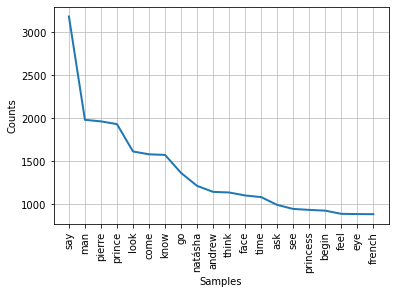

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [34]:
from nltk import FreqDist

fd = FreqDist(lemmatized_text.split())
fd.plot(20)

In [35]:
fd.most_common(20)

[('say', 3186),
 ('man', 1981),
 ('pierre', 1963),
 ('prince', 1931),
 ('look', 1612),
 ('come', 1579),
 ('know', 1572),
 ('go', 1362),
 ('natásha', 1211),
 ('andrew', 1141),
 ('think', 1134),
 ('face', 1099),
 ('time', 1080),
 ('ask', 989),
 ('see', 942),
 ('princess', 931),
 ('begin', 922),
 ('feel', 885),
 ('eye', 882),
 ('french', 881)]

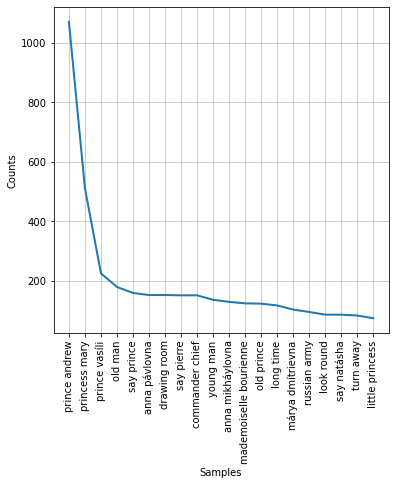

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [36]:
import matplotlib.pyplot as plt
from nltk import bigrams

f = plt.figure(figsize=(6, 6))
fd_bg = FreqDist(map(' '.join, bigrams(lemmatized_text.split())))
fd_bg.plot(20)

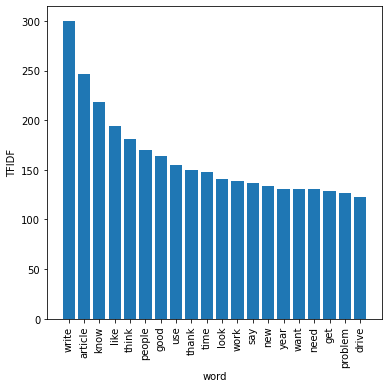

In [37]:
import matplotlib.pyplot as plt
import numpy as np

idx_to_word = {v: k for k, v in tfidf_vectorizer.vocabulary_.items()}

num_words = 20
tfidf_sum = np.asarray(ng_train_tfidf.sum(axis=0)).flatten()
sorted_idx = tfidf_sum.argsort()[::-1]
tfidf_sum = tfidf_sum[sorted_idx]

f = plt.figure(figsize=(5.5, 5.5))
xticks = range(num_words)
plt.bar(xticks, tfidf_sum[:num_words])
plt.xticks(xticks, [idx_to_word[i] for i in sorted_idx[:num_words]], rotation=90)
plt.xlabel('word')
plt.ylabel('TFIDF')
plt.tight_layout()

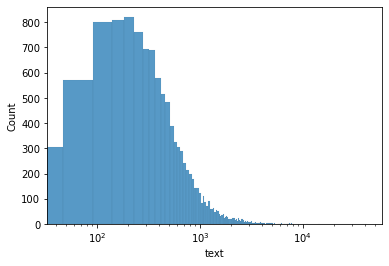

In [38]:
import seaborn as sns

sns.histplot(ng_train_df['text'].apply(lambda x: len(x)))
plt.xscale('log')

In [39]:
from sklearn.feature_extraction.text import CountVectorizer

def get_top_grams(docs, n=2):
    v = CountVectorizer(ngram_range=(n, n))
    grams = v.fit_transform(docs)
    gram_sum = np.array(np.sum(grams, axis=0)).flatten()
    gram_dict = {i: v for v, i in v.vocabulary_.items()}
    top_grams = gram_sum.argsort()[::-1]
    
    return [gram_dict[i] for i in top_grams], gram_sum[top_grams]

This version also prints out top ngrams.

In [40]:
from sklearn.feature_extraction.text import CountVectorizer

def get_top_grams(docs, n=2, top=20, verbose=False):
    v = CountVectorizer(ngram_range=(n, n))
    grams = v.fit_transform(docs)
    gram_sum = np.array(np.sum(grams, axis=0)).flatten()
    gram_dict = {i: v for v, i in v.vocabulary_.items()}
    top_grams = gram_sum.argsort()[::-1]
    if verbose:
        print(f'top {top} {n}-grams:\n')
        for i in top_grams[:top]:
            print('"' + gram_dict[i] + '" shows up', gram_sum[i], 'times')
        print('\n')
    
    return [gram_dict[i] for i in top_grams], gram_sum[top_grams]

In [41]:
ngrams, ngram_counts = {}, {}
for n in [1, 2, 3]:
    ngrams[n], ngram_counts[n] = get_top_grams([lemmatized_text], n=n)

In [42]:
from scipy.stats import zipf

def make_zipf_plot(counts, tokens, a=1.15):
    # inspired from here: https://finnaarupnielsen.wordpress.com/2013/10/22/zipf-plot-for-word-counts-in-brown-corpus/
    ranks = np.arange(1, len(counts) + 1)
    indices = np.argsort(-counts)
    normalized_frequencies = counts[indices] / sum(counts)

    f = plt.figure(figsize=(5.5, 5.5))
    plt.loglog(ranks, normalized_frequencies, marker=".")
    
    plt.loglog(ranks, [z for z in zipf.pmf(ranks, a)])
    
    plt.title("Zipf Plot")
    plt.xlabel("Word frequency rank")
    plt.ylabel("Word frequency")
    
    ax = plt.gca()
    ax.set_aspect('equal')  # make the plot square
    plt.grid(True)
    
    # add text labels
    last_freq = None
    for i in list(np.logspace(-0.5, np.log10(len(counts) - 1), 10).astype(int)):
        dummy = plt.text(ranks[i], normalized_frequencies[i], " " + tokens[indices[i]], 
                         verticalalignment="bottom",
                         horizontalalignment="left")
    
    plt.tight_layout()
    
    plt.show()

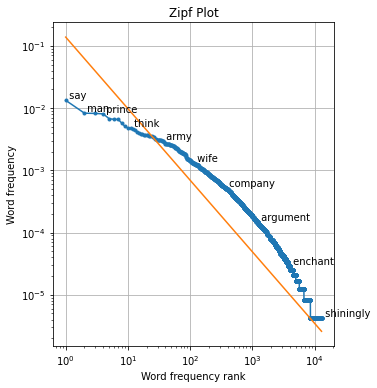

In [43]:
make_zipf_plot(ngram_counts[1], ngrams[1])

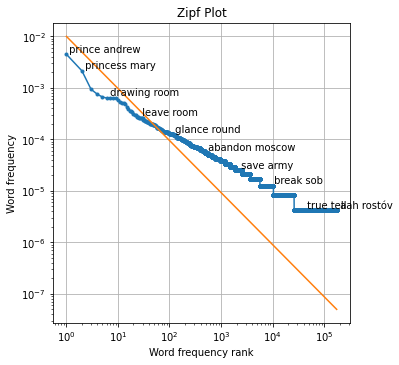

In [44]:
make_zipf_plot(ngram_counts[2], ngrams[2], a=1.01)

## Word collocations

In [45]:
from nltk.collocations import BigramAssocMeasures, BigramCollocationFinder

BigramCollocationFinder.from_words(lemmatized_text.split()).nbest(BigramAssocMeasures().pmi, 10)

[('ab', 'ovo'),
 ('academy', 'jotting'),
 ('achtung', 'nehman'),
 ('agwee', 'evewythe'),
 ('ahahah', 'rrrr'),
 ('alliée', 'sincère'),
 ('alliés', 'détruite'),
 ('alphonse', 'kárlovich'),
 ('amber', 'mouthpiece'),
 ('amstetten', 'melk')]

In [46]:
BigramCollocationFinder.from_words(lemmatized_text.split()).score_ngrams(BigramAssocMeasures().pmi)

[(('ab', 'ovo'), 17.87246447190116),
 (('academy', 'jotting'), 17.87246447190116),
 (('achtung', 'nehman'), 17.87246447190116),
 (('agwee', 'evewythe'), 17.87246447190116),
 (('ahahah', 'rrrr'), 17.87246447190116),
 (('alliée', 'sincère'), 17.87246447190116),
 (('alliés', 'détruite'), 17.87246447190116),
 (('alphonse', 'kárlovich'), 17.87246447190116),
 (('amber', 'mouthpiece'), 17.87246447190116),
 (('amstetten', 'melk'), 17.87246447190116),
 (('aprons', 'insignia'), 17.87246447190116),
 (('ar', 'ate'), 17.87246447190116),
 (('armfeldts', 'bennigsens'), 17.87246447190116),
 (('arming', 'concentrating'), 17.87246447190116),
 (('arnauts', 'arnaut'), 17.87246447190116),
 (('att', 'ention'), 17.87246447190116),
 (('aubert', 'chalmé'), 17.87246447190116),
 (('aussi', 'spirituelle'), 17.87246447190116),
 (('awistocwacy', 'pwovince'), 17.87246447190116),
 (('awl', 'soap'), 17.87246447190116),
 (('axle', 'cog'), 17.87246447190116),
 (('baltic', 'provinces'), 17.87246447190116),
 (('barclays',

## POS tags

In [47]:
pos_dict = {}
pos_dict['word'] = []
pos_dict['POS'] = []
for word in processed_text:
    if word.is_alpha and not word.is_stop:
        pos_dict['word'].append(word.lower_)
        pos_dict['POS'].append(word.pos_)
        
wnp_pos_df = pd.DataFrame(pos_dict)

In [48]:
wnp_pos_df.groupby('POS').count().sort_values(by='word', ascending=False).head(10)

,word
POS,
NOUN,91438
VERB,72857
PROPN,30608
ADJ,29702
ADV,11091
INTJ,1407
ADP,942
AUX,500
SCONJ,412


In [49]:
wnp_pos_df['count'] = 1

In [50]:
wnp_pos_df.groupby(['POS', 'word']).count().sort_values(by='count', ascending=False).head(10)

count
POS   word          
VERB  said      2839
PROPN pierre    1963
      prince    1592
      natásha   1211
NOUN  man       1171
PROPN andrew    1141
NOUN  time       927
      face       882
VERB  went       862
      know       846

In [51]:
from spacy.glossary import GLOSSARY
GLOSSARY

{'ADJ': 'adjective',
 'ADP': 'adposition',
 'ADV': 'adverb',
 'AUX': 'auxiliary',
 'CONJ': 'conjunction',
 'CCONJ': 'coordinating conjunction',
 'DET': 'determiner',
 'INTJ': 'interjection',
 'NOUN': 'noun',
 'NUM': 'numeral',
 'PART': 'particle',
 'PRON': 'pronoun',
 'PROPN': 'proper noun',
 'PUNCT': 'punctuation',
 'SCONJ': 'subordinating conjunction',
 'SYM': 'symbol',
 'VERB': 'verb',
 'X': 'other',
 'EOL': 'end of line',
 'SPACE': 'space',
 '.': 'punctuation mark, sentence closer',
 ',': 'punctuation mark, comma',
 '-LRB-': 'left round bracket',
 '-RRB-': 'right round bracket',
 '``': 'opening quotation mark',
 '""': 'closing quotation mark',
 "''": 'closing quotation mark',
 ':': 'punctuation mark, colon or ellipsis',
 '$': 'symbol, currency',
 '#': 'symbol, number sign',
 'AFX': 'affix',
 'CC': 'conjunction, coordinating',
 'CD': 'cardinal number',
 'DT': 'determiner',
 'EX': 'existential there',
 'FW': 'foreign word',
 'HYPH': 'punctuation mark, hyphen',
 'IN': 'conjunction, su

# Topic modeling

In [52]:
list(zip(newsgroups_train['target_names'], range(len(newsgroups_train['target_names']))))

[('alt.atheism', 0),
 ('comp.graphics', 1),
 ('comp.os.ms-windows.misc', 2),
 ('comp.sys.ibm.pc.hardware', 3),
 ('comp.sys.mac.hardware', 4),
 ('comp.windows.x', 5),
 ('misc.forsale', 6),
 ('rec.autos', 7),
 ('rec.motorcycles', 8),
 ('rec.sport.baseball', 9),
 ('rec.sport.hockey', 10),
 ('sci.crypt', 11),
 ('sci.electronics', 12),
 ('sci.med', 13),
 ('sci.space', 14),
 ('soc.religion.christian', 15),
 ('talk.politics.guns', 16),
 ('talk.politics.mideast', 17),
 ('talk.politics.misc', 18),
 ('talk.religion.misc', 19)]

In [53]:
space_ng = ng_train_df[ng_train_df['label'] == 14].copy().reset_index()

In [54]:
from pycaret.nlp import setup, create_model, plot_model, assign_model, tune_model

space_setup = setup(space_ng, target='text')

Description,Value
session_id,4438
Documents,593
Vocab Size,7396
Custom Stopwords,False


In [55]:
lda = create_model('lda')

In [56]:
plot_model(lda, 'topic_model')

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
2     -0.190104  0.043814       1        1  28.949412
1      0.061770  0.168455       2        1  28.501786
0      0.196466 -0.066502       3        1  25.117211
3     -0.068132 -0.145767       4        1  17.431592, topic_info=          Term        Freq       Total Category  logprob  loglift
46       write  423.000000  423.000000  Default  30.0000  30.0000
17      launch  328.000000  328.000000  Default  29.0000  29.0000
0      article  333.000000  333.000000  Default  28.0000  28.0000
962      think  250.000000  250.000000  Default  27.0000  27.0000
484  satellite  247.000000  247.000000  Default  26.0000  26.0000
..         ...         ...         ...      ...      ...      ...
63        base   32.655294  121.819005   Topic4  -5.7179   0.4304
928       work   34.192729  162.038332   Topic4  -5.6719   0.1911
463    project   30.587201  125.411355   Topic4  -5.7833   0.3359
177      space   34.543106  783.647735   Topic4  -5.6617  -1.3749
919       time   30.202391  230.609819   Topic4  -5.7959  -0.2859

[300 rows x 6 columns], token_table=      Topic      Freq        Term
term                             
237       2  0.935854  accomplish
831       1  0.408328    actually
831       3  0.097999    actually
831       4  0.506326    actually
1362      2  0.950737          ad
...     ...       ...         ...
46        4  0.294994       write
234       1  0.474169        year
234       2  0.373489        year
234       3  0.110423        year
234       4  0.045468        year

[499 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[3, 2, 1, 4])

In [57]:
lda_results = assign_model(lda)
lda_results

,index,text,label,Topic_0,Topic_1,Topic_2,Topic_3,Dominant_Topic,Perc_Dominant_Topic
0,4,article pack rat write clear caution warn memo...,14,0.001929,0.001766,0.191230,0.805075,Topic 3,0.81
1,13,article write description external_tank option...,14,0.000359,0.938360,0.060858,0.000423,Topic 1,0.94
2,49,oddly smithsonian call year golden age flight ...,14,0.002804,0.002568,0.991331,0.003297,Topic 2,0.99
3,59,archive space modify_date upcoming planetary p...,14,0.751157,0.248170,0.000474,0.000200,Topic 0,0.75
4,119,article write pluto atmosphere start freeze in...,14,0.090835,0.003968,0.011756,0.893441,Topic 3,0.89
...,...,...,...,...,...,...,...,...,...
588,11198,archive space controversy modify_date controve...,14,0.649683,0.211882,0.086373,0.052062,Topic 0,0.65
589,11216,article leigh palmer write article write natio...,14,0.002489,0.002279,0.992305,0.002927,Topic 2,0.99
590,11261,guy write gravity maneuver exploit fuzzy regio...,14,0.603836,0.001706,0.005182,0.389277,Topic 0,0.60
591,11275,article pat write happen hypothesis shuttle fl...,14,0.001694,0.165090,0.313491,0.519725,Topic 3,0.52


In [58]:
from gensim.models import CoherenceModel

cm = CoherenceModel(model=lda, texts=lda_results['text'].map(str.split).tolist(), dictionary=lda.id2word)
cm.get_coherence()

0.3903924377119177

In [59]:
coherences = []
for num_topics in range(2, 16):
    lda = create_model('lda', num_topics=num_topics)
    lda_results = assign_model(lda)
    cm = CoherenceModel(model=lda, texts=lda_results['text'].map(str.split).tolist(), dictionary=lda.id2word)
    coherences.append(cm.get_coherence())

In [60]:
coherences

[0.3287639075960368,
 0.41286719267286626,
 0.3903924377119177,
 0.3686437100082084,
 0.371270319900679,
 0.38012880325576887,
 0.3916106491192418,
 0.4229313131604606,
 0.39865754650251406,
 0.3671035349736236,
 0.4271548963341792,
 0.4135070463740813,
 0.4320688402720529,
 0.42903410673306314]

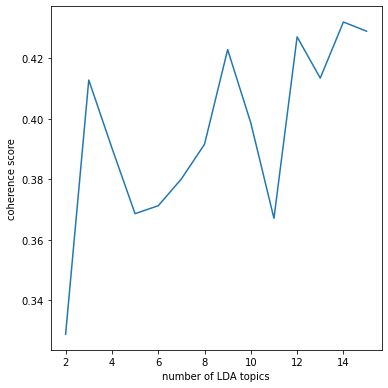

In [61]:
f = plt.figure(figsize=(5.5, 5.5))
plt.plot(range(2, 16), coherences)
plt.xlabel('number of LDA topics')
plt.ylabel('coherence score')
plt.tight_layout()

## Top2Vec

In [62]:
from top2vec import Top2Vec
import pandas as pd

raw_ng_df = pd.DataFrame({'text': newsgroups_train['data'], 'label': newsgroups_train['target']})
raw_space_df = raw_ng_df[raw_ng_df['label'] == 14].copy()
model = Top2Vec(documents=raw_space_df['text'].to_list(), speed="learn", workers=8)

2021-09-04 19:56:04,348 - top2vec - INFO - Pre-processing documents for training
2021-09-04 19:56:04,660 - top2vec - INFO - Creating joint document/word embedding
2021-09-04 19:56:06,734 - top2vec - INFO - Creating lower dimension embedding of documents
2021-09-04 19:56:13,466 - top2vec - INFO - Finding dense areas of documents
2021-09-04 19:56:13,487 - top2vec - INFO - Finding topics


In [63]:
model.get_topics()[-1].shape[0]

3

In [64]:
topic_words, word_scores, topic_nums = model.get_topics()

In [65]:
topic_words

array([['again', 'need', 'about', 'no', 'one', 'much', 'so', 'have',
        'll', 'not', 'out', 'it', 'know', 'how', 'any', 'give', 'there',
        'can', 'back', 'those', 'that', 'all', 'old', 'want', 'every',
        'part', 'even', 'is', 'case', 'if', 'area', 'more', 'but', 'to',
        'remember', 'without', 'find', 'than', 'when', 'probably',
        'some', 're', 'such', 'my', 'see', 'does', 'with', 'anyone',
        'sure', 'large'],
       ['say', 'really', 'going', 'maybe', 'isn', 'what', 'not', 'like',
        'something', 'else', 'said', 'too', 'anything', 'who', 'think',
        'll', 'even', 'idea', 'someone', 'that', 'got', 'thing', 'it',
        'little', 'problem', 'my', 'right', 'work', 'doing', 'know',
        'done', 'much', 'big', 'question', 'go', 'why', 'could',
        'actually', 'they', 'so', 'sure', 'never', 'make', 'probably',
        'since', 'have', 'when', 'you', 'do', 'then'],
       ['date', 'an', 'exploration', 'following', 'also', 'near',
        's

# Supervised learning

This is an example of using word vectors as features.

To sample down for testing, use `.sample(100).reset_index(drop=True)` when creating the train and test dfs.

In [66]:
newsgroups_train.keys()

dict_keys(['data', 'filenames', 'target_names', 'target', 'DESCR'])

In [67]:
newsgroups_train = fetch_20newsgroups(remove=('headers', 'footers'))
newsgroups_test = fetch_20newsgroups(subset='test', remove=('headers', 'footers'))

en_large = spacy.load('en_core_web_lg', disable=['parser', 'ner'])

def get_document_vectors(text):
    processed = en_large(text)
    return processed.vector

ng_train_df = pd.DataFrame({'text': newsgroups_train['data'], 'label': newsgroups_train['target']})
ng_train_doc_vectors = pd.DataFrame(np.vstack(ng_train_df['text'].swifter.apply(get_document_vectors).tolist()))
ng_test_df = pd.DataFrame({'text': newsgroups_test['data'], 'label': newsgroups_test['target']})
ng_test_doc_vectors = pd.DataFrame(np.vstack(ng_test_df['text'].swifter.apply(get_document_vectors).tolist()))

Pandas Apply:   0%|          | 0/11314 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/7532 [00:00<?, ?it/s]

In [68]:
ng_train_vector_df = pd.concat([ng_train_df['label'].astype('category'), ng_train_doc_vectors], axis=1)
ng_test_vector_df = pd.concat([ng_test_df['label'].astype('category'), ng_test_doc_vectors], axis=1)

In [69]:
ng_train_vector_df['label'].value_counts(normalize=True)

10    0.053032
15    0.052943
8     0.052855
9     0.052766
11    0.052590
7     0.052501
13    0.052501
5     0.052413
14    0.052413
12    0.052236
2     0.052236
3     0.052148
6     0.051706
1     0.051617
4     0.051087
17    0.049850
16    0.048259
0     0.042425
18    0.041100
19    0.033322
Name: label, dtype: float64

In [70]:
ng_train_vector_df

,label,0,1,2,3,4,5,6,7,8,...,290,291,292,293,294,295,296,297,298,299
0,7,0.049449,0.208646,-0.147693,-0.069303,0.111246,0.013155,-0.011483,-0.193518,-0.076543,...,-0.238563,-0.023253,0.073658,-0.060100,0.028431,-0.066519,-0.040197,-0.013038,0.005436,0.116571
1,4,-0.016288,0.146424,-0.089363,-0.051657,0.028966,0.000430,0.026072,-0.118393,0.003177,...,-0.217318,0.051244,0.011505,-0.013299,0.024465,-0.090747,-0.010024,-0.053404,-0.058587,0.066247
2,4,-0.010889,0.191336,-0.159281,-0.034975,0.075878,0.007909,0.008473,-0.141111,0.013498,...,-0.205405,0.018488,0.009842,-0.051622,0.040851,-0.019679,-0.051688,-0.064055,0.038421,0.108117
3,1,-0.032975,0.212198,-0.103774,-0.066658,0.110629,0.073716,0.004324,-0.122965,0.021230,...,-0.123165,0.043717,-0.070767,-0.038084,0.019652,-0.027046,-0.028275,-0.081501,0.017188,0.105726
4,14,-0.020413,0.191989,-0.181565,-0.077202,0.125920,0.051840,0.052221,-0.123223,0.021617,...,-0.135401,0.078578,-0.082896,-0.071532,0.048404,-0.037308,-0.081020,-0.056971,-0.018536,0.031489
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11309,13,-0.058751,0.194507,-0.173803,-0.041258,0.081166,-0.052215,0.016737,-0.129954,0.057909,...,-0.061515,0.021197,-0.025507,-0.049623,0.072904,-0.023158,-0.041457,-0.066105,0.005039,0.073422
11310,4,0.048711,0.111870,-0.118484,-0.028413,0.059593,-0.009119,-0.012691,-0.174223,0.017714,...,-0.207440,0.000102,0.017769,-0.045889,-0.028098,0.015380,0.004067,-0.069923,-0.020632,0.080148
11311,3,0.018623,0.135743,-0.021562,-0.039196,0.059757,-0.017441,-0.053337,-0.117367,0.040548,...,-0.212937,0.034250,0.022499,-0.092744,-0.026803,-0.071181,0.025616,-0.062586,-0.032105,0.099645
11312,1,-0.041982,0.195727,-0.172599,-0.013106,0.107306,-0.020535,-0.013844,-0.113062,-0.004407,...,-0.120684,0.027344,-0.069214,-0.080793,0.036182,0.006319,-0.065134,-0.104145,0.060681,0.101618


pycaret can be used but is slow with larger feature sets.

In [71]:
ng_train_vector_df.columns

Index(['label',       0,       1,       2,       3,       4,       5,       6,
             7,       8,
       ...
           290,     291,     292,     293,     294,     295,     296,     297,
           298,     299],
      dtype='object', length=301)

In [72]:
from pycaret.classification import setup, create_model, tune_model, evaluate_model

ng_setup = setup(ng_train_vector_df, test_data=ng_test_vector_df, fold=3, target='label')
lr = create_model('lr')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.7068,0.9656,0.6938,0.7038,0.7001,0.6911,0.6915
1,0.7263,0.9693,0.7144,0.7286,0.7196,0.7117,0.7122
2,0.7221,0.9692,0.7086,0.7182,0.7157,0.7072,0.7076
Mean,0.7184,0.9681,0.7056,0.7169,0.7118,0.7033,0.7037
SD,0.0084,0.0017,0.0087,0.0102,0.0084,0.0088,0.0089


In [73]:
# this takes a while but could be used to fine-tune the model
# tuned_lr = tune_model(lr, search_library='scikit-optimize')

In [74]:
evaluate_model(lr)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

Using TFIDF vectors.

In [75]:
vectorizer = TfidfVectorizer(min_df=10, max_df=0.9)
train_tfidf = vectorizer.fit_transform(newsgroups_train['data'])
test_tfidf = vectorizer.transform(newsgroups_test['data'])

In [76]:
type(newsgroups_train['target'])

numpy.ndarray

In [77]:
train_tfidf_df = pd.DataFrame(train_tfidf.todense())
test_tfidf_df = pd.DataFrame(test_tfidf.todense())
train_tfidf_df['label'] = pd.Series(newsgroups_train['target']).astype('category')
test_tfidf_df['label'] = pd.Series(newsgroups_test['target']).astype('category')

In [78]:
train_tfidf_df.shape

(11314, 13270)

In [79]:
test_tfidf_df.shape

(7532, 13270)

In [80]:
ng_train_df.shape

(11314, 2)

In [81]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(ng_train_vector_df.drop('label', axis=1), ng_train_vector_df['label'])
lr.score(ng_train_vector_df.drop('label', axis=1), ng_train_vector_df['label'])

0.7585292557892876

In [82]:
lr.score(ng_test_vector_df.drop('label', axis=1), ng_test_vector_df['label'])

0.6869357408390866

In [83]:
lr = LogisticRegression()
lr.fit(train_tfidf_df.drop('label', axis=1), train_tfidf_df['label'])
lr.score(train_tfidf_df.drop('label', axis=1), train_tfidf_df['label'])

0.9432561428318897

In [84]:
lr.score(test_tfidf_df.drop('label', axis=1), test_tfidf_df['label'])

0.7683218268720128

# Sentiment analysis

In [85]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

vader = SentimentIntensityAnalyzer()

def get_sentiment(text):
    return vader.polarity_scores(text.lower())['compound']

ng_train_df['sentiment_score'] = ng_train_df['text'].swifter.apply(get_sentiment)

Pandas Apply:   0%|          | 0/11314 [00:00<?, ?it/s]

In [86]:
label_dict = {i: label for i, label in enumerate(newsgroups_train['target_names'])}
ng_train_df['label'].replace(label_dict, inplace=True)

In [87]:
ng_train_df.groupby('label').mean().sort_values(by='sentiment_score', ascending=False)

,sentiment_score
label,
comp.graphics,0.547356
misc.forsale,0.493030
rec.sport.hockey,0.470409
rec.sport.baseball,0.469508
sci.electronics,0.431782
comp.sys.ibm.pc.hardware,0.430881
sci.space,0.424613
soc.religion.christian,0.395767
comp.os.ms-windows.misc,0.394298


In [88]:
ng_train_df[(ng_train_df['label'] == 'talk.politics.guns') & (ng_train_df['sentiment_score'] < -0.5)].sample(3, random_state=42)['text'].tolist()

['I was shocked to see that the subject of my last rely to awesley was\n"Luser!"  That was certainly not my intention.  I meant to leave the\nsubject line unchanged.  I believe that the NNTP server I use at columbia\nmust have put in that subject line in protest over problems with my header.\n That was rather rude of them, but beggars can\'t be choosers, I suppose.\n\nIn any case, I didn\'t do it and I apologize to awesley for the apparent\ninsult.',
 "In article <C4tM1H.ECF@magpie.linknet.com>, manes@magpie.linknet.com (Steve Manes) writes:\n>\n>For chrissakes, take out your calculator and work out the numbers.\n>Here... I've preformatted them for you to make it easier:\n>\n>\t\t\thandgun homicides/population\n>\t\t\t----------------------------\n>\tSwitzerland :\t24 /  6,350,000\n>\t         UK :    8 / 55,670,000\n>\n>.... and then tell me again how Switzerland is safer with a more\n>liberal handgun law than the UK is without...by RATE or TOTAL NUMBER.\n>Your choice.\n\nPlease, PAY 

In [89]:
ng_train_df[(ng_train_df['label'] == 'talk.politics.guns') & (ng_train_df['sentiment_score'] < -0.5)].sample(3, random_state=42)

,text,label,sentiment_score
5141,I was shocked to see that the subject of my la...,talk.politics.guns,-0.8197
1347,"In article <C4tM1H.ECF@magpie.linknet.com>, ma...",talk.politics.guns,-0.9744
8114,----------------------------------------------...,talk.politics.guns,-0.9999


In [90]:
ng_train_df[(ng_train_df['label'] == 'comp.graphics') & (ng_train_df['sentiment_score'] > 0.5)].sample(3, random_state=42)['text'].tolist()

['I am looking for comments from people who have used/heard about PhotoShop\nfor Windows. Is it good? How does it compare to the Mac version? Is there\na lot of bugs (I heard the Windows version needs "fine-tuning)?\n\nAny comments would be greatly appreciated..\n\nThank you.',
 "bolson@carson.u.washington.edu (Edward Bolson) writes:\n\n>Boy, this will be embarassing if it is trivial or an FAQ:\n\n>Given 4 points (non coplanar), how does one find the sphere, that is,\n>center and radius, exactly fitting those points?  I know how to do it\n>for a circle (from 3 points), but do not immediately see a \n>straightforward way to do it in 3-D.  I have checked some\n>geometry books, Graphics Gems, and Farin, but am still at a loss?\n>Please have mercy on me and provide the solution?  \n\nIt's not a bad question: I don't have any refs that list this algorithm\neither. But thinking about it a bit, it shouldn't be too hard.\n\n1) Take three of the points and find the plane they define as well as\

In [91]:
ng_train_df[(ng_train_df['label'] == 'comp.graphics') & (ng_train_df['sentiment_score'] > 0.5)].sample(3, random_state=42)

,text,label,sentiment_score
8581,I am looking for comments from people who have...,comp.graphics,0.8693
8374,bolson@carson.u.washington.edu (Edward Bolson)...,comp.graphics,0.9829
9785,I am setting up a video-aid for a computer roo...,comp.graphics,0.7964


<AxesSubplot:xlabel='sentiment_score', ylabel='Count'>

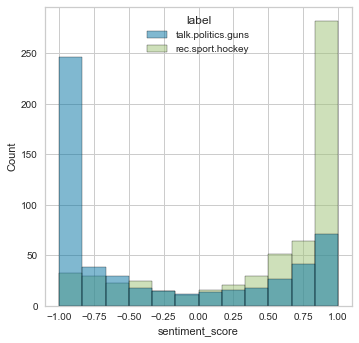

In [92]:
import seaborn as sns
import matplotlib.pyplot as plt

f = plt.figure(figsize=(5.5, 5.5))
sns.histplot(ng_train_df[ng_train_df['label'].isin(['talk.politics.guns', 'rec.sport.hockey'])], x='sentiment_score', hue='label')